In [369]:
import pandas as pd

In [370]:
animals = pd.read_csv('project1.csv')

In [371]:
# Part 1 (2) Get the geneeral information of the dataset

In [372]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [373]:
# Based on the information, they are all object datatype. Breed, Color, Sex upon Outcome, Outcome Type and Outcome Subtype need to convert to categorical dtype, and Age upon outcome convert to float dtype 

In [374]:
# Check Categorial Values

In [375]:
animals['Outcome Type'].unique()

array(['Transfer', 'Adoption', nan], dtype=object)

In [376]:
animals['Outcome Subtype'].unique()

array(['Partner', nan, 'Foster', 'Offsite', 'SCRP', 'Snr', 'Barn',
       'Out State', 'Emer', 'In State'], dtype=object)

In [377]:
# Part 1(1) Identify the shape of the dataset

In [378]:
animals.shape

(131165, 12)

In [379]:
# the shape of the dataset is 131165 rows and 12 columns

In [380]:
animals.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [381]:
# Check the duplicate rows

In [382]:
animals.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
131160    False
131161    False
131162    False
131163    False
131164    False
Length: 131165, dtype: bool

In [383]:
# Part 1(2)  Check the total number of the duplicated rows & remove the duplicate rows

In [384]:
animals.duplicated().sum()

17

In [385]:
animals.drop_duplicates(inplace=True, ignore_index=True)

In [386]:
# Part 1(3) the missing data is names, Outcome Type, and Outcome Subtype Column

In [387]:
# Since the name is not an important feature for the later training, fill it with a random name

In [388]:
animals['Name'].fillna('Max', inplace= True)

/tmp/ipykernel_41/539242683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  animals['Name'].fillna('Max', inplace= True)


In [389]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131148 non-null  object
 1   Date of Birth     131148 non-null  object
 2   Name              131148 non-null  object
 3   DateTime          131148 non-null  object
 4   MonthYear         131148 non-null  object
 5   Outcome Type      131108 non-null  object
 6   Outcome Subtype   65802 non-null   object
 7   Animal Type       131148 non-null  object
 8   Sex upon Outcome  131148 non-null  object
 9   Age upon Outcome  131148 non-null  object
 10  Breed             131148 non-null  object
 11  Color             131148 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [390]:
missing_subtype = animals[animals['Outcome Subtype'].isna()]

In [391]:
len(missing_subtype)

65346

In [392]:
adpotion_missing = missing_subtype[missing_subtype['Outcome Type'] == 'Adoption']

In [393]:
adpotion_missing

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
8,A683090,4/22/14,Jenny Tyson,2014-07-11T00:00:00-05:00,Jul-14,Adoption,NaN,Dog,Spayed Female,2 months,Black Mouth Cur Mix,Brown/Black
32,A698568,3/13/12,Bella,2015-03-14T00:00:00-05:00,Mar-15,Adoption,NaN,Dog,Intact Female,3 years,Chihuahua Shorthair,Sable
47,A699357,10/16/14,*Finn,2015-04-02T00:00:00-05:00,Apr-15,Adoption,NaN,Dog,Neutered Male,5 months,Australian Cattle Dog Mix,White/Red Tick
48,A699358,10/16/14,*Lacey,2015-04-03T00:00:00-05:00,Apr-15,Adoption,NaN,Dog,Spayed Female,5 months,Australian Cattle Dog Mix,White/Brown Brindle
50,A699917,2/4/15,Max,2015-04-08T00:00:00-05:00,Apr-15,Adoption,NaN,Dog,Spayed Female,2 months,Labrador Retriever Mix,Black/White
...,...,...,...,...,...,...,...,...,...,...,...,...
131129,A917477,11/6/23,Canelo,2025-05-04T17:53:00,May-25,Adoption,NaN,Dog,Neutered Male,1 year,Mastiff/Pit Bull,Brown Brindle
131130,A926142,7/6/24,*Big Red,2025-05-04T18:03:00,May-25,Adoption,NaN,Dog,Neutered Male,9 months,Labrador Retriever Mix,Red
131131,A928232,4/10/23,Gus,2025-05-04T18:08:00,May-25,Adoption,NaN,Dog,Neutered Male,2 years,Mastiff,Brown/Black
131134,A929205,12/2/24,Max,2025-05-04T18:46:00,May-25,Adoption,NaN,Dog,Neutered Male,5 months,Australian Cattle Dog,White/Black


In [394]:
len(adpotion_missing)

65308

In [395]:
# most missing Outcome Subtype are the adoptions outcome type

In [396]:
adoption_mode = (animals[animals['Outcome Type'] == 'Adoption']['Outcome Subtype'].mode()[0])

In [397]:
adoption_mode

'Foster'

In [398]:
animals['Outcome Subtype'].fillna('Foster', inplace= True)

/tmp/ipykernel_41/4209187715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  animals['Outcome Subtype'].fillna('Foster', inplace= True)


In [399]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131148 non-null  object
 1   Date of Birth     131148 non-null  object
 2   Name              131148 non-null  object
 3   DateTime          131148 non-null  object
 4   MonthYear         131148 non-null  object
 5   Outcome Type      131108 non-null  object
 6   Outcome Subtype   131148 non-null  object
 7   Animal Type       131148 non-null  object
 8   Sex upon Outcome  131148 non-null  object
 9   Age upon Outcome  131148 non-null  object
 10  Breed             131148 non-null  object
 11  Color             131148 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [400]:
animals = animals.dropna(subset=['Outcome Type'])

In [401]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131108 non-null  object
 1   Date of Birth     131108 non-null  object
 2   Name              131108 non-null  object
 3   DateTime          131108 non-null  object
 4   MonthYear         131108 non-null  object
 5   Outcome Type      131108 non-null  object
 6   Outcome Subtype   131108 non-null  object
 7   Animal Type       131108 non-null  object
 8   Sex upon Outcome  131108 non-null  object
 9   Age upon Outcome  131108 non-null  object
 10  Breed             131108 non-null  object
 11  Color             131108 non-null  object
dtypes: object(12)
memory usage: 13.0+ MB


In [402]:
# the code below was generated by AI; See [1]
# change the Age upon outcome to float Part 1(6)

In [403]:
import numpy as np
import re

In [404]:
unit_to_days = {"day":1, "week":7, "month":30, "year":365}

def parse_age(s):
    if pd.isna(s):
        return np.nan
    s = str(s).lower().strip()
    match = re.match(r"(\d+)\s*(day|week|month|year)s?", s)
    if match:
        value, unit = int(match.group(1)), match.group(2)
        return value * unit_to_days[unit]
    return np.nan

In [405]:
animals['Age_years'] = (animals['Age upon Outcome'].apply(parse_age))/365

In [406]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Animal ID         131108 non-null  object 
 1   Date of Birth     131108 non-null  object 
 2   Name              131108 non-null  object 
 3   DateTime          131108 non-null  object 
 4   MonthYear         131108 non-null  object 
 5   Outcome Type      131108 non-null  object 
 6   Outcome Subtype   131108 non-null  object 
 7   Animal Type       131108 non-null  object 
 8   Sex upon Outcome  131108 non-null  object 
 9   Age upon Outcome  131108 non-null  object 
 10  Breed             131108 non-null  object 
 11  Color             131108 non-null  object 
 12  Age_years         131108 non-null  float64
dtypes: float64(1), object(12)
memory usage: 14.0+ MB


In [407]:
# Part 1(4) Visualize the dataset

Text(0.5, 0, 'Age (years)')

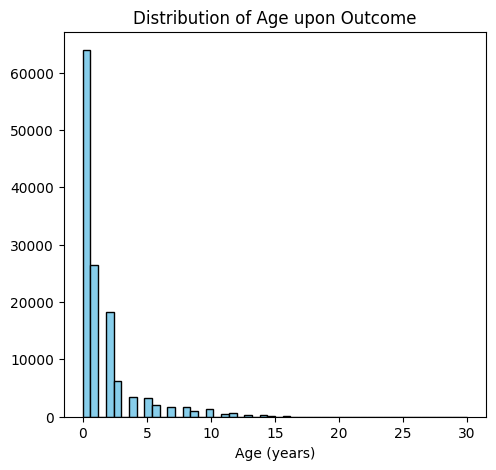

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.hist(animals['Age_years'].dropna(), bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Age upon Outcome")
plt.xlabel("Age (years)")

In [409]:
# Comment: Most outcomes occur early in an animals'life, with the majority under two years old 

In [410]:
animals['Animal Type'].unique()

array(['Bird', 'Dog', 'Cat', 'Livestock'], dtype=object)

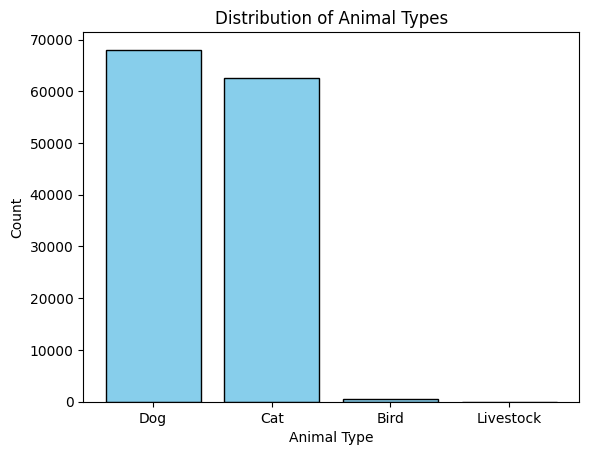

In [411]:
counts = animals['Animal Type'].value_counts()

plt.bar(counts.index, counts.values, color="skyblue", edgecolor="black")

plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

In [412]:
# Comment: Majority of the cases are dogs and cats, and Bird and Livestock is only contribute a small portion an

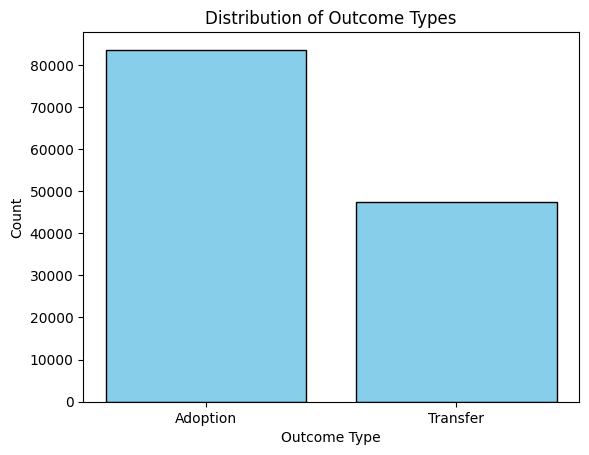

In [413]:
counts_outcometype = animals['Outcome Type'].value_counts()

plt.bar(counts_outcometype.index, counts_outcometype.values, color="skyblue", edgecolor="black")

plt.title("Distribution of Outcome Types")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.show()



In [414]:
# Comment: Adpotion is more frequent than transfer, but transfer still represents a significant portion

In [415]:
animals['Sex upon Outcome'].unique()

array(['Unknown', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Neutered Male'], dtype=object)

In [416]:
animals['Color'].unique()

array(['Yellow/Black', 'Brown/Black', 'Brown', 'Black/White', 'Black',
       'White', 'Brown/White', 'Tan', 'Blue Tabby', 'Cream', 'Gold',
       'Red', 'Fawn/White', 'White/Gray', 'Torbie', 'Sable', 'Yellow',
       'White/Black', 'White/Chocolate', 'Cream/Black', 'White/Brown',
       'Chocolate/White', 'White/Red Tick', 'White/Brown Brindle',
       'Buff/Gray', 'Black/Tan', 'Blue Merle/Black', 'Chocolate',
       'White/Tan', 'Tan/White', 'Pink', 'Tricolor', 'Red/White',
       'Calico', 'Brown Tabby/White', 'Brown Brindle', 'Blue Tick/Black',
       'Blue/White', 'Black/Brown', 'Green/Blue', 'Brown Tabby',
       'Orange Tabby', 'Tortie', 'Blue Merle', 'Orange/Tan',
       'White/White', 'Orange Tabby/White', 'Cream Tabby',
       'Cream Tabby/White', 'Lilac Point', 'Lynx Point', 'Black/Buff',
       'White/Cream Tabby', 'Seal Point', 'Blue Merle/White',
       'Brown Brindle/White', 'Sable/Buff', 'Chocolate/Tan',
       'Brown/Brown', 'Tortie Point', 'Orange/Orange Tabby',
     

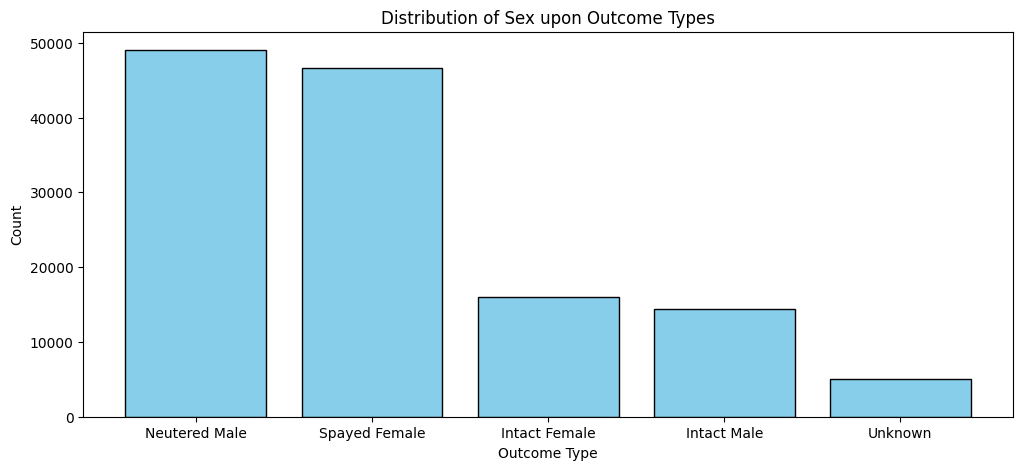

In [417]:
counts_sextype = animals['Sex upon Outcome'].value_counts()
plt.figure(figsize=(12,5))
plt.bar(counts_sextype.index, counts_sextype.values, color="skyblue", edgecolor="black")
plt.title("Distribution of Sex upon Outcome Types")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.show()

In [418]:
# Most animals have outcomes are Neutered Male and Spayed Female, with fewer intact Female and Intact Male

In [419]:
# Part 1(6) Convert data to categorcial datatype

In [420]:
cat_cols = ['Animal Type', 'Outcome Type','Outcome Subtype', 'Breed', 'Color', 'Sex upon Outcome']
for col in cat_cols:
    animals[col] = animals[col].astype('category')

In [421]:
animals_encoded = pd.get_dummies(animals, columns=cat_cols, drop_first=True)

In [422]:
# Part 1(5) drop irrelevant columns

In [423]:
column_drop = ["Name","Animal ID", "Date of Birth", "DateTime", "MonthYear", "Breed","Outcome Subtype","Age upon Outcome"]

In [424]:
animals_train = animals.drop(columns = column_drop)

In [425]:
animals_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Outcome Type      131108 non-null  category
 1   Animal Type       131108 non-null  category
 2   Sex upon Outcome  131108 non-null  category
 3   Color             131108 non-null  category
 4   Age_years         131108 non-null  float64 
dtypes: category(4), float64(1)
memory usage: 2.6 MB


In [426]:
# Since color have to many types, convert the color type to light, darck and other

In [427]:
dark_colors  = {'black','brown','blue','gray','red','chocolate','sable'}
light_colors = {'white','tan','yellow','cream','orange','fawn','silver','buff'}

animals_train['MainColor'] = (
    animals_train['Color'].str.split('/').str[0].str.strip().str.lower()
)

def map_color(c):
    if pd.isna(c):
        return "Other"
    c = c.strip().lower()

    if "tabby" in c:
        return "Light" if "orange" in c else "Dark"
    if any(x in c for x in ["tortie","torbie","brindle","calico","tricolor"]):
        return "Other"

    if any(k in c for k in dark_colors):
        return "Dark"
    if any(k in c for k in light_colors):
        return "Light"

    return "Other"

animals_train['ColorGroup'] = animals_train['MainColor'].apply(map_color)


In [428]:
animals_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Outcome Type      131108 non-null  category
 1   Animal Type       131108 non-null  category
 2   Sex upon Outcome  131108 non-null  category
 3   Color             131108 non-null  category
 4   Age_years         131108 non-null  float64 
 5   MainColor         131108 non-null  object  
 6   ColorGroup        131108 non-null  object  
dtypes: category(4), float64(1), object(2)
memory usage: 4.6+ MB


In [429]:
animals_train['ColorGroup'].unique()

array(['Light', 'Dark', 'Other'], dtype=object)

In [430]:
animals_train['ColorGroup'].value_counts()

ColorGroup
Dark     77979
Light    35077
Other    18052
Name: count, dtype: int64

In [431]:
other_colors = animals_train[animals_train['ColorGroup'] == 'Other']['Color'].value_counts().head(10)

In [432]:
animals_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Outcome Type      131108 non-null  category
 1   Animal Type       131108 non-null  category
 2   Sex upon Outcome  131108 non-null  category
 3   Color             131108 non-null  category
 4   Age_years         131108 non-null  float64 
 5   MainColor         131108 non-null  object  
 6   ColorGroup        131108 non-null  object  
dtypes: category(4), float64(1), object(2)
memory usage: 4.6+ MB


In [433]:
animals_train= animals_train.drop('MainColor', axis=1)

In [446]:
animals_train= animals_train.drop('Color', axis=1)

In [471]:
# Part 1 (5)

In [447]:
animals_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Outcome Type      131108 non-null  category
 1   Animal Type       131108 non-null  category
 2   Sex upon Outcome  131108 non-null  category
 3   Age_years         131108 non-null  float64 
 4   ColorGroup        131108 non-null  object  
dtypes: category(3), float64(1), object(1)
memory usage: 3.4+ MB


In [448]:
animals_train['Outcome Type'].unique()

['Transfer', 'Adoption']
Categories (2, object): ['Adoption', 'Transfer']

In [449]:
cat_cols = ['Outcome Type', 'Animal Type', 'Sex upon Outcome', 'ColorGroup']

In [472]:
# Part 1 (7) one-hot encoding on categorical values 

In [450]:
animals_trained = pd.get_dummies(animals_train, columns=cat_cols, drop_first=True)

In [451]:
animals_trained.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age_years                       131108 non-null  float64
 1   Outcome Type_Transfer           131108 non-null  bool   
 2   Animal Type_Cat                 131108 non-null  bool   
 3   Animal Type_Dog                 131108 non-null  bool   
 4   Animal Type_Livestock           131108 non-null  bool   
 5   Sex upon Outcome_Intact Male    131108 non-null  bool   
 6   Sex upon Outcome_Neutered Male  131108 non-null  bool   
 7   Sex upon Outcome_Spayed Female  131108 non-null  bool   
 8   Sex upon Outcome_Unknown        131108 non-null  bool   
 9   ColorGroup_Light                131108 non-null  bool   
 10  ColorGroup_Other                131108 non-null  bool   
dtypes: bool(10), float64(1)
memory usage: 3.3 MB


In [473]:
# Part 2 Training the model

In [ ]:
# Part 2(2) split dataset into training and test datasets

In [453]:
X = animals_trained.drop('Outcome Type_Transfer', axis=1)

In [454]:
y = animals_trained['Outcome Type_Transfer']

In [455]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [479]:
# Part 2(3)K-Nearest Neighbor Classifier 

In [487]:
knn = KNeighborsClassifier(n_neighbors=10) # setting the hyperparameter to 15
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [459]:
# create a dictionary of all values we want to test 

In [488]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.6}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.6}'.format(accuracy_train))


Accuracy of knn on test data is : 0.854499
Accuracy of knn on train data is : 0.852443


In [489]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.95      0.89     25074
        True       0.88      0.69      0.77     14259

    accuracy                           0.85     39333
   macro avg       0.86      0.82      0.83     39333
weighted avg       0.86      0.85      0.85     39333



In [462]:
knn_search_accuracy = KNeighborsClassifier()

In [463]:
param_grid = {"n_neighbors":np.arange(1,100)}

In [464]:
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [465]:
# Cross validation

In [466]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [490]:
# finding the best K-value

In [467]:
knn_gscv.best_params_

{'n_neighbors': 42}

In [481]:
best_knn = knn_gscv.best_estimator_
y_pred = best_knn.predict(X_test)

In [482]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.96      0.90     25074
        True       0.91      0.69      0.78     14259

    accuracy                           0.86     39333
   macro avg       0.88      0.82      0.84     39333
weighted avg       0.87      0.86      0.86     39333



In [468]:
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 Outcome Type_Transfer
False    0.637494
True     0.362506
Name: proportion, dtype: float64
Test class distribution:
 Outcome Type_Transfer
False    0.63748
True     0.36252
Name: proportion, dtype: float64


In [469]:
# Check the Outcome Type to see is there any invalid

In [475]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.05, random_state=1)
clf.fit(X_train, y_train)
# Check the accuracy on the test data
accuracy_test=accuracy_score(y_test, clf.predict(X_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, clf.predict(X_train))


In [476]:
accuracy_test

0.8487783794777922

In [478]:
accuracy_train

0.8459057477526559

In [483]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.97      0.89     25074
        True       0.92      0.64      0.75     14259

    accuracy                           0.85     39333
   macro avg       0.87      0.80      0.82     39333
weighted avg       0.86      0.85      0.84     39333



In [484]:
f1_test = f1_score(y_test, clf.predict(X_test))

In [485]:
f1_test

0.7544989268614826

In [486]:
animals['Outcome Type'].unique()


['Transfer', 'Adoption']
Categories (2, object): ['Adoption', 'Transfer']